# Kernel Density Estimation:

The following code applies Kernel Density Estimation (KDE) to approximate the pdf of a Gamma distribution. We use the Gaussian kernel, and test different values for the bandwidth $\sigma$.

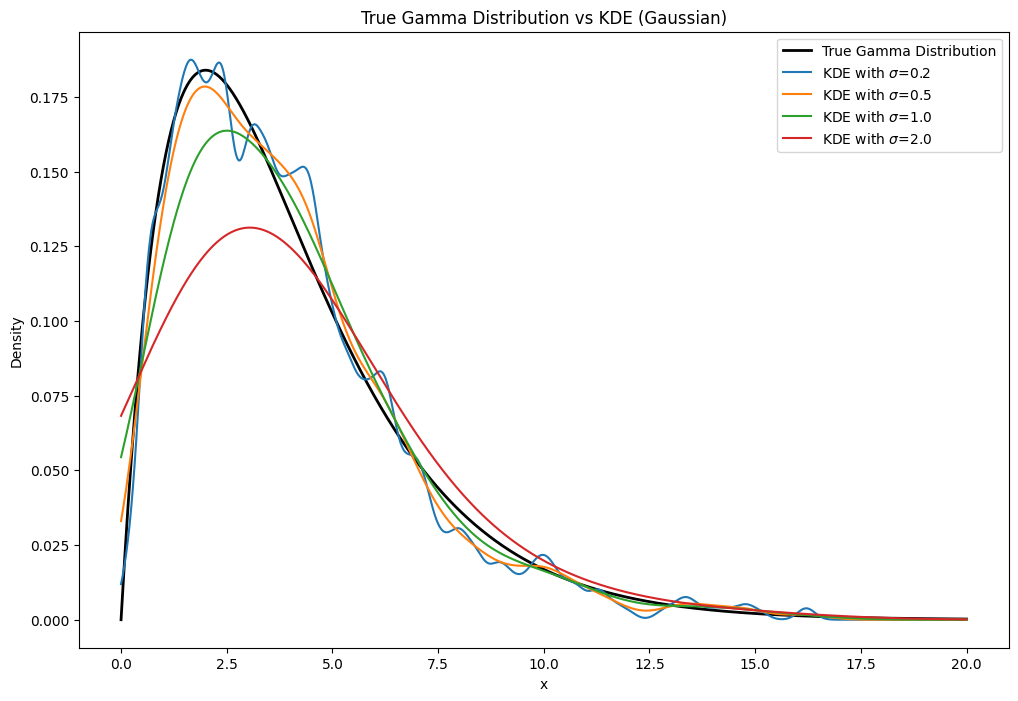

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from sklearn.neighbors import KernelDensity

# Parameters for the true Gamma distribution
shape_param = 2.0  # k (shape parameter)
scale_param = 2.0  # theta (scale parameter)

# Generate sample data from the Gamma distribution
np.random.seed(0)
sample_size = 1000
data = np.random.gamma(shape=shape_param, scale=scale_param, size=sample_size)

# Values to evaluate the PDF and KDE
x_values = np.linspace(0, 20, 1000)

# Compute the true Gamma PDF
true_pdf = gamma.pdf(x_values, a=shape_param, scale=scale_param)

# Bandwidth (σ) values to test in KDE
sigma_values = [0.2, 0.5, 1.0, 2.0]

# Plot the true distribution and KDE approximations for different σ values
plt.figure(figsize=(12, 8))
plt.plot(x_values, true_pdf, label='True Gamma Distribution', color='black', linewidth=2)

for sigma in sigma_values:
    # Perform KDE with Gaussian kernel and the given bandwidth (σ)
    kde = KernelDensity(kernel='gaussian',
           bandwidth=sigma).fit(data[:, np.newaxis])
    log_kde_pdf = kde.score_samples(x_values[:, np.newaxis])
    kde_pdf = np.exp(log_kde_pdf)

    # Plot the KDE estimate
    plt.plot(x_values, kde_pdf, label=f'KDE with $\sigma$={sigma}')

# Plot settings
plt.xlabel('x')
plt.ylabel('Density')
plt.title('True Gamma Distribution vs KDE (Gaussian)')
plt.legend()
plt.show()

# Kernel Density Regression

The following code applies KDE to approximate the joint distribution of a multivariate Gaussian. It utilizes the 'scott' option of the `gaussian_kde` package of `scipy.stats`, which chooses the "optimal" value for the bandwidth.

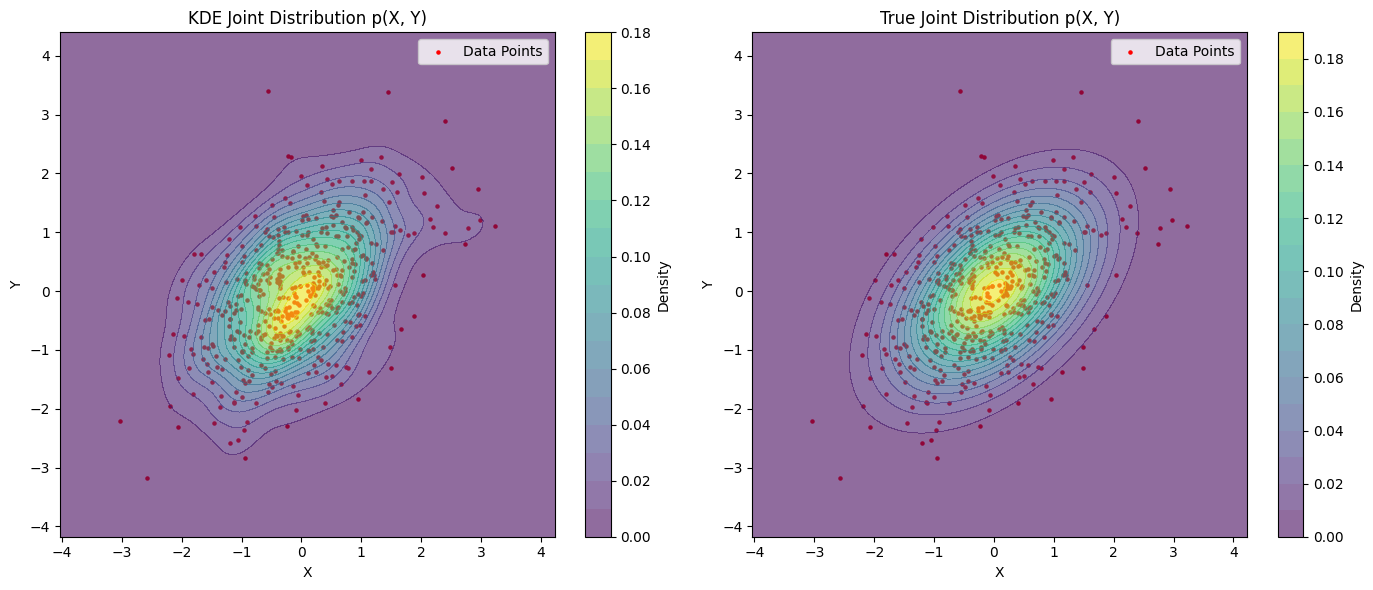

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# I can import Gaussian KDE from scipy.stats as well!
from scipy.stats import gaussian_kde, multivariate_normal

# Synthetic dataset from bivariate normal distribution
np.random.seed(1)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix
X, Y = np.random.multivariate_normal(mean, cov, 500).T

# Stack X and Y to create a 2D dataset for KDE
data = np.vstack([X, Y])

# Perform KDE on the dataset (X, Y)
# The 'scott' method is used to deduce an "optimal" bandwidth
kde = gaussian_kde(data, bw_method='scott')

# Grid to evaluate densities
x_grid = np.linspace(X.min() - 1, X.max() + 1, 100)
y_grid = np.linspace(Y.min() - 1, Y.max() + 1, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Vertically stack the data points and transpose to get [x1 y1; x2 y2; ...]
positions = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# Compute the KDE for the grid points and return a grid shape
Z_kde = kde(positions.T).reshape(X_grid.shape)

# Compute the true joint density
true_density = multivariate_normal(mean=mean, cov=cov)
Z_true = true_density.pdf(positions).reshape(X_grid.shape)

plt.figure(figsize=(14, 6))

# KDE density plot
plt.subplot(1, 2, 1)
plt.scatter(X, Y, s=5, color='red', label='Data Points')
plt.contourf(X_grid, Y_grid, Z_kde, levels=20,
             cmap='viridis', alpha=0.6)
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KDE Joint Distribution p(X, Y)')
plt.legend()

# True density plot
plt.subplot(1, 2, 2)
plt.scatter(X, Y, s=5, color='red', label='Data Points')
plt.contourf(X_grid, Y_grid, Z_true, levels=20,
             cmap='viridis', alpha=0.6)
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Joint Distribution p(X, Y)')
plt.legend()

plt.tight_layout()
plt.show()